In [15]:

import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['figure.figsize']=[16,12] 
pd.set_option('display.max_columns', 80) 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:

data = pd.read_csv('data/processed_data.csv')

In [5]:
# 将 deal_date 转换为日期格式



data['deal_date'] = pd.to_datetime(data['deal_date'])
# 只保留2018年8月31号和2018年9月1号的数据
data = data[(data['deal_date'].dt.date == pd.to_datetime('2018-08-31').date()) | 
            (data['deal_date'].dt.date == pd.to_datetime('2018-09-01').date())]





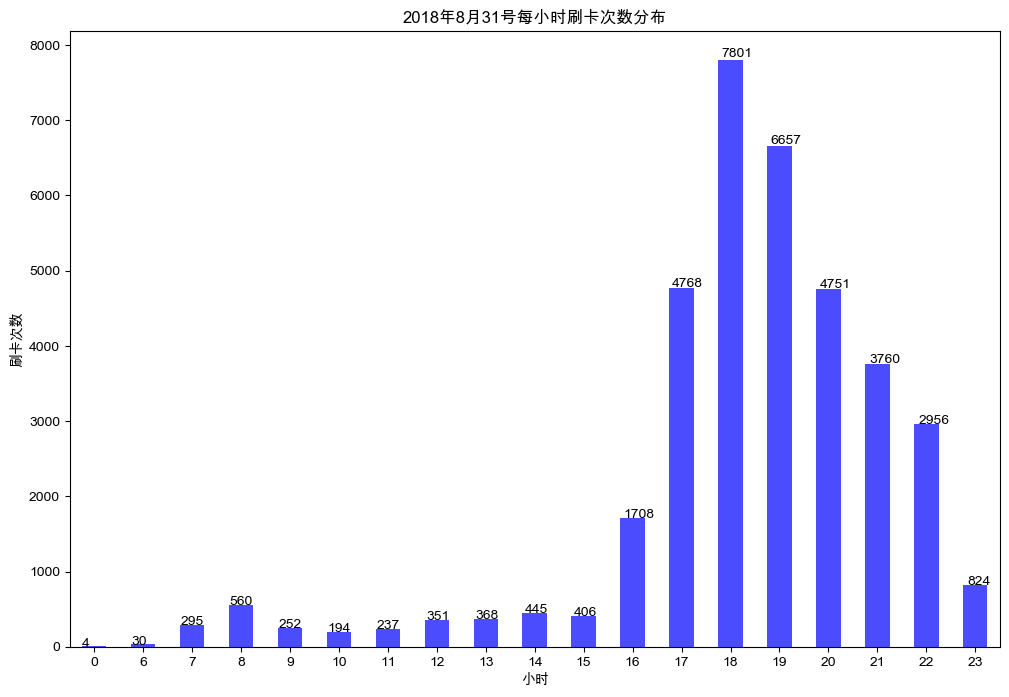

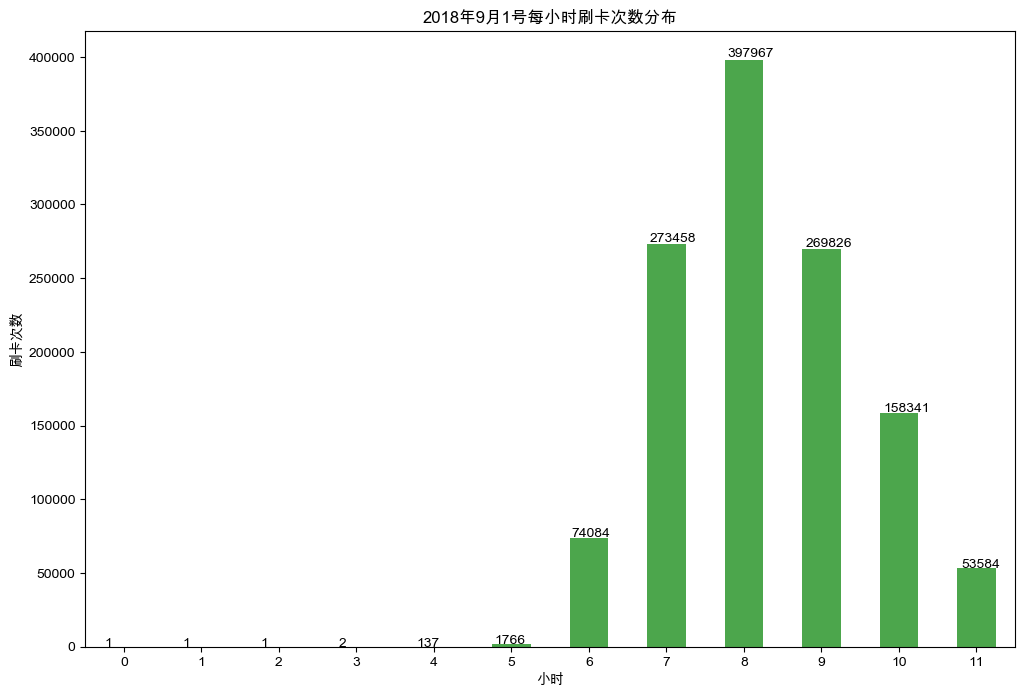

In [7]:
# 查看2018年8月31号和2018年9月1号每天每小时的分布
data['hour'] = data['deal_date'].dt.hour

# 分别获取2018年8月31号和2018年9月1号的数据
data_0831 = data[data['deal_date'].dt.date == pd.to_datetime('2018-08-31').date()]
data_0901 = data[data['deal_date'].dt.date == pd.to_datetime('2018-09-01').date()]

# 计算每小时的刷卡次数
hourly_counts_0831 = data_0831.groupby('hour').size()
hourly_counts_0901 = data_0901.groupby('hour').size()

# 绘制2018年8月31号的刷卡次数分布
plt.figure(figsize=(12, 8))
ax = hourly_counts_0831.plot(kind='bar', color='blue', alpha=0.7)
plt.title('2018年8月31号每小时刷卡次数分布')
plt.xlabel('小时')
plt.ylabel('刷卡次数')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# 绘制2018年9月1号的刷卡次数分布
plt.figure(figsize=(12, 8))
ax = hourly_counts_0901.plot(kind='bar', color='green', alpha=0.7)
plt.title('2018年9月1号每小时刷卡次数分布')
plt.xlabel('小时')
plt.ylabel('刷卡次数')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [13]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_file(output_file='data/eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

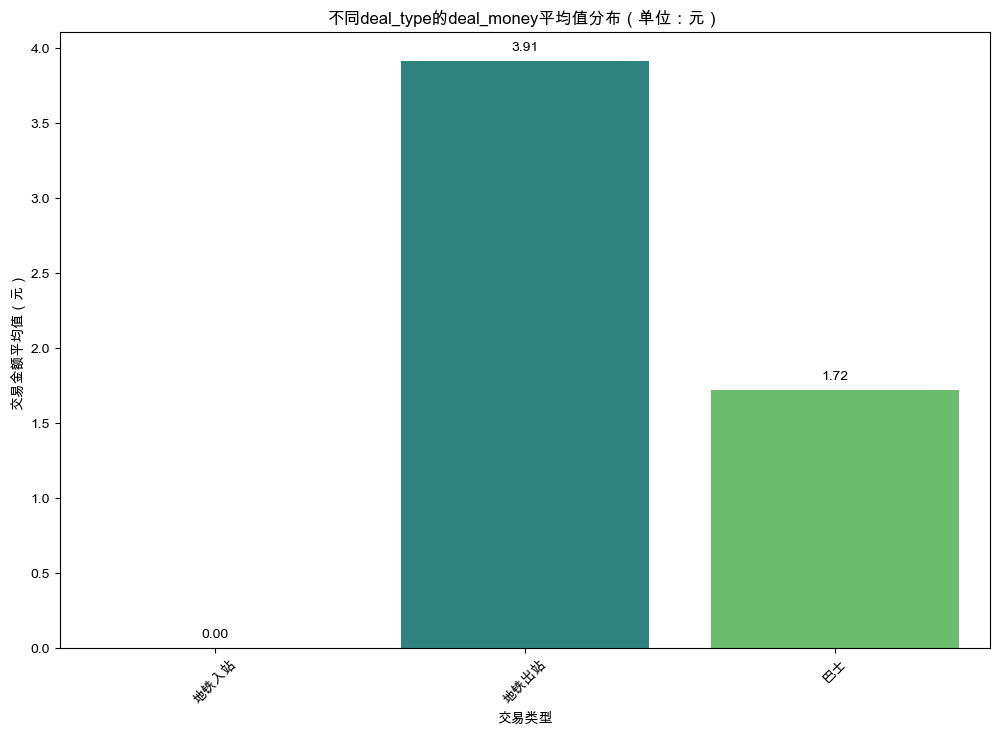

In [19]:
# 分析不同deal_type的deal_money平均值（单位为分，转换成元）
data['deal_money_yuan'] = data['deal_money'] / 100  # 将单位从分转换成元
deal_money_by_type = data.groupby('deal_type')['deal_money_yuan'].mean().reset_index()

# 绘制不同deal_type的deal_money平均值分布（单位为元）
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='deal_type', y='deal_money_yuan', data=deal_money_by_type, palette='viridis')
plt.title('不同deal_type的deal_money平均值分布（单位：元）')
plt.xlabel('交易类型')
plt.ylabel('交易金额平均值（元）')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()




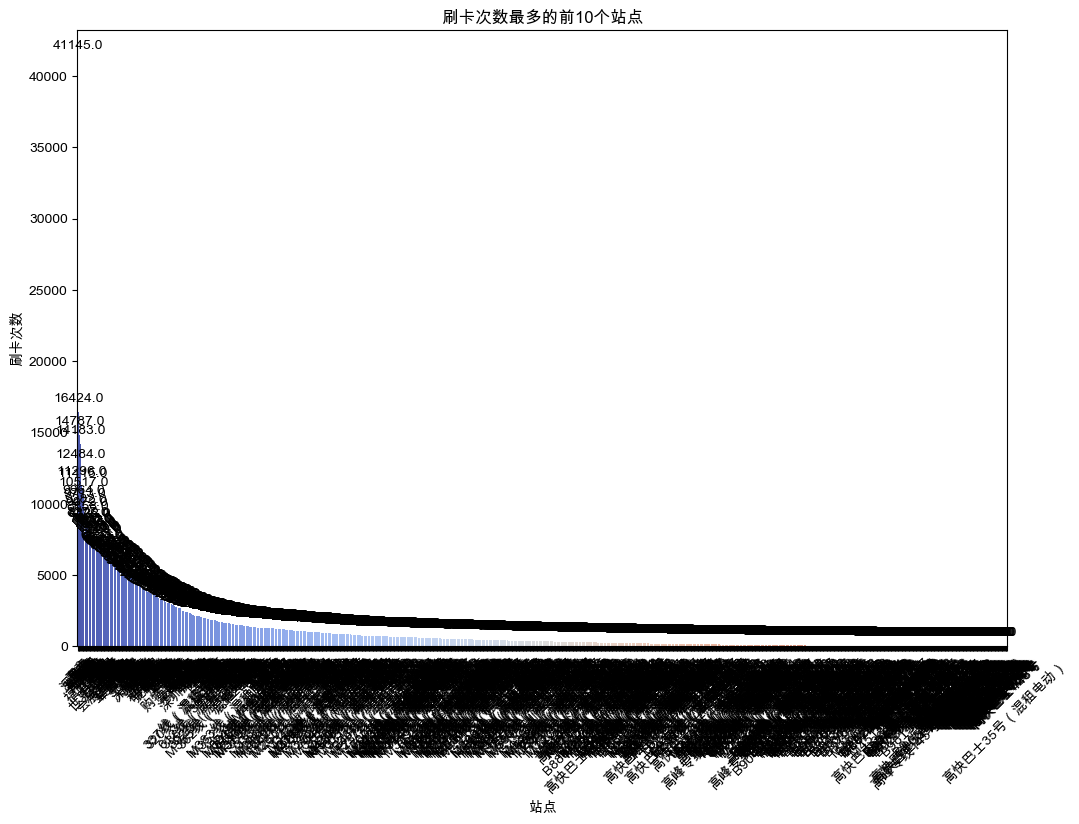

In [22]:
# 分析station的分布

# 统计每个station的刷卡次数
station_counts = data['station'].value_counts().reset_index()
station_counts.columns = ['station', 'count']

# 绘制station刷卡次数分布
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='station', y='count', data=station_counts, palette='coolwarm')
plt.title('刷卡次数最多的前10个站点')
plt.xlabel('站点')
plt.ylabel('刷卡次数')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()



In [23]:
station_counts

,station,count
0,深圳北,41145
1,五和,16424
2,布吉,14787
3,罗湖站,14183
4,民治,12484
...,...,...
1185,高快巴士754号,1
1186,高快巴士35号（混租电动）,1
1187,B901线,1
1188,高快巴士729号,1
